# 1. Import Packages

In [5]:
%load_ext autoreload
%autoreload 2
import os
import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
from scripts.analysis_core import analyze_event
import pprint
import itertools
from tqdm.notebook import tqdm
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
drop_keys = ['original_full_png', 'omega_full_png', 'resample_ratio_png', 'plot_dir']
def append_result_to_df(result, df=None, drop_keys=drop_keys):
    clean_result = {k: v for k, v in result.items() if k not in drop_keys}
    row = pd.DataFrame([clean_result])
    if df is None:
        df = row
    else:
        df = pd.concat([df, row], ignore_index=True)
    return df

# 2. Define Parameters and Paths

In [22]:
# parameters
start = 100
end = 690
interval = 300
step = 50

depth_pairs = []
current = start
while current + interval <= end:
    depth_pairs.append((current, current + interval))
    current += step

event_dates = ["20231001-2221"]
data_path = "/home/lulu/data/inci30"
output_path = "../results"
instrument_types = ["borehole", "fiber"]   # "fiber" or "borehole"
wave_types = ["p", "s"]             # "p" or "s"
depth_pairs = depth_pairs     # depth

param_combinations = list(itertools.product(event_dates, depth_pairs, instrument_types, wave_types))

# 3. Analyze

Processing:   0%|          | 0/24 [00:00<?, ?it/s]

[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 400m → #1332 (misfit: 0.2m)
[BOREHOLE] 100m → MDSA1 (misfit: 6.1m)
[BOREHOLE] 400m → MDSA3 (misfit: 8.0m)
Error with 20231001-2221, (100, 400), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.MDSA3..GL*.SAC
[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 400m → #1332 (misfit: 0.2m)
[BOREHOLE] 100m → MDSA1 (misfit: 6.1m)
[BOREHOLE] 400m → MDSA3 (misfit: 8.0m)
Error with 20231001-2221, (100, 400), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.MDSA3..GL*.SAC
[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 400m → #1332 (misfit: 0.2m)
[BOREHOLE] 100m → MDSA1 (misfit: 6.1m)
[BOREHOLE] 400m → MDSA3 (misfit: 8.0m)



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 34120.41it/s]


SNR: 0.9391
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(100, 400)
SNR: 0.6726
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(100, 400)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 112.11it/s]


Results for Station #01258
  Fitted Omega_0: 2.824750452421073e-10
  Fitted f_c: 0.6006217607253342
  Fitted t*: 0.034192692646912104



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 112.19it/s]


Results for Station #01332
  Fitted Omega_0: 1.0354195891602573e-10
  Fitted f_c: 0.6575952102585695
  Fitted t*: 0.015213876633188031
Plot saved to ../results/20231001-2221/fiber-p/(100, 400)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.82283,12.303673,0.006512,0.013958,6.16139,0.014742,0.014671,0.01907,0.000046


[FIBER] 100m → #1258 (misfit: 2.0m)
[FIBER] 400m → #1332 (misfit: 0.2m)
[BOREHOLE] 100m → MDSA1 (misfit: 6.1m)
[BOREHOLE] 400m → MDSA3 (misfit: 8.0m)



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 34778.70it/s]


Processing Station 1...
Processed


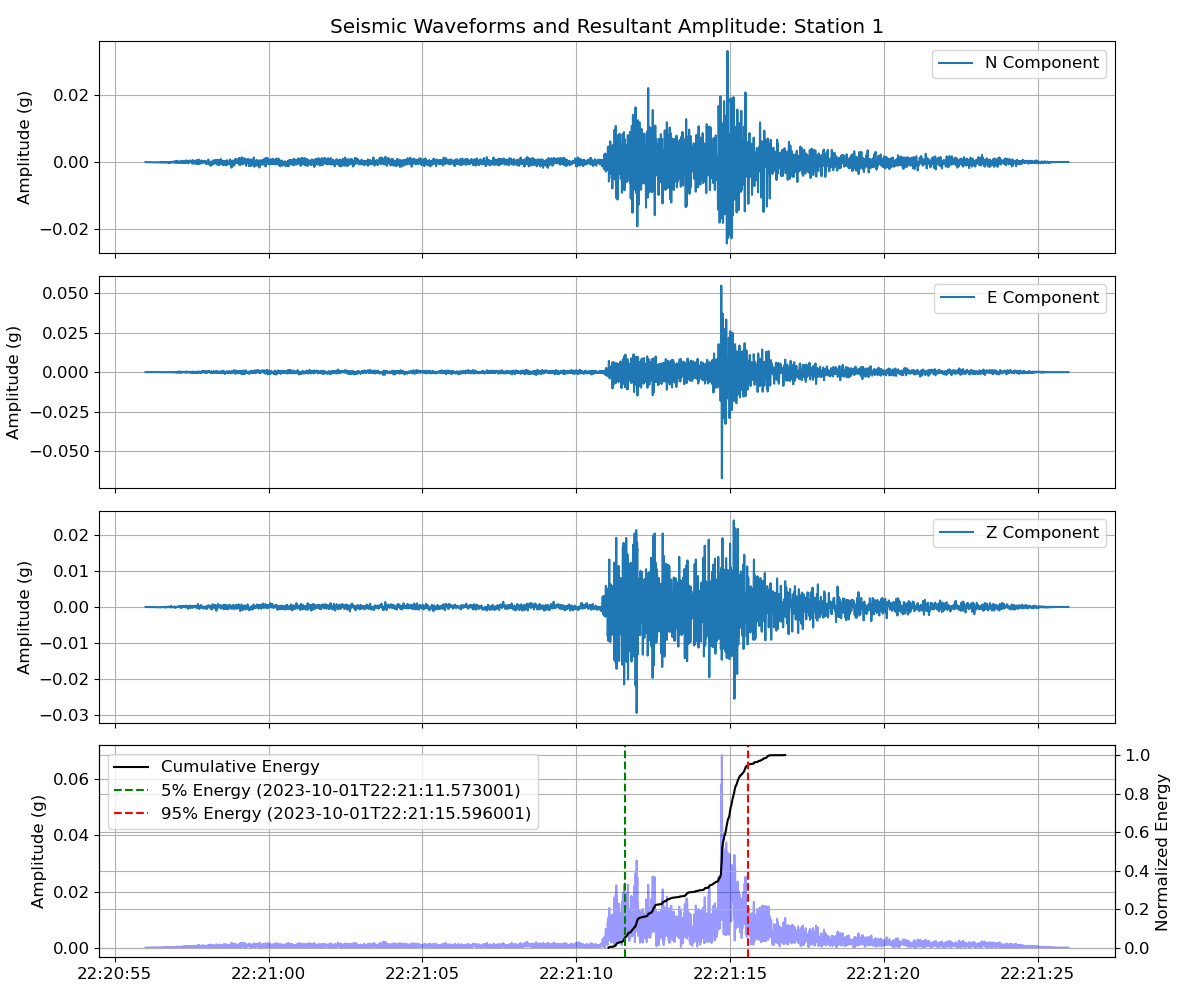

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.4968
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(100, 400)
SNR: 0.4742
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(100, 400)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 111.60it/s]


Results for Station #01258
  Fitted Omega_0: 3.697410097893024e-10
  Fitted f_c: 0.60664109102021
  Fitted t*: 0.02329077638653312



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 111.79it/s]


Results for Station #01332
  Fitted Omega_0: 1.5365877986388387e-10
  Fitted f_c: 0.5393740335410813
  Fitted t*: 0.010636881390416138
Plot saved to ../results/20231001-2221/fiber-s/(100, 400)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066


[FIBER] 150m → #1271 (misfit: 1.1m)
[FIBER] 450m → #1344 (misfit: 0.8m)
[BOREHOLE] 150m → None
[BOREHOLE] 450m → None
Error with 20231001-2221, (150, 450), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 150m → #1271 (misfit: 1.1m)
[FIBER] 450m → #1344 (misfit: 0.8m)
[BOREHOLE] 150m → None
[BOREHOLE] 450m → None
Error with 20231001-2221, (150, 450), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 150m → #1271 (misfit: 1.1m)
[FIBER] 450m → #1344 (misfit: 0.8m)
[BOREHOLE] 150m → None
[BOREHOLE] 450m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 23852.89it/s]


SNR: 0.8917
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(150, 450)
SNR: 0.5848
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(150, 450)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 112.11it/s]


Results for Station #01271
  Fitted Omega_0: 1.6070939091790173e-10
  Fitted f_c: 0.6131490485894869
  Fitted t*: 0.0173542833138937



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 112.16it/s]


Results for Station #01344
  Fitted Omega_0: 9.763090439319867e-11
  Fitted f_c: 0.5780473122354192
  Fitted t*: 0.01555303716620842
Plot saved to ../results/20231001-2221/fiber-p/(150, 450)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027


[FIBER] 150m → #1271 (misfit: 1.1m)
[FIBER] 450m → #1344 (misfit: 0.8m)
[BOREHOLE] 150m → None
[BOREHOLE] 450m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 36322.25it/s]


Processing Station 1...
Processed


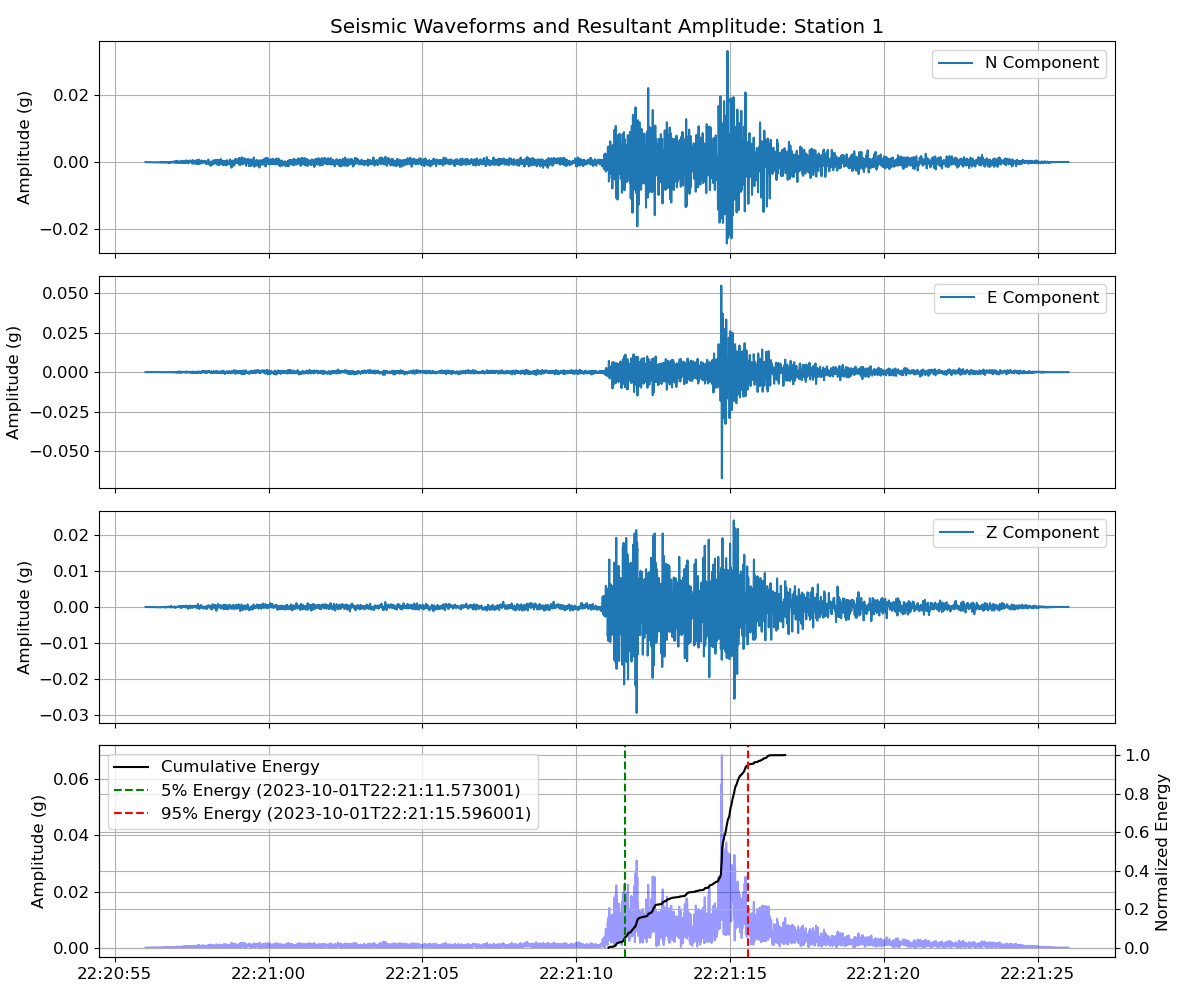

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.8259
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(150, 450)
SNR: 0.5748
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(150, 450)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 115.37it/s]


Results for Station #01271
  Fitted Omega_0: 2.556365944197497e-10
  Fitted f_c: 0.6203341841379687
  Fitted t*: 0.0280306327538299



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 117.04it/s]


Results for Station #01344
  Fitted Omega_0: 1.3751459228467223e-10
  Fitted f_c: 0.6215654331046371
  Fitted t*: 0.00798162290384553
Plot saved to ../results/20231001-2221/fiber-s/(150, 450)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001


[FIBER] 200m → #1283 (misfit: 0.1m)
[FIBER] 500m → #1356 (misfit: 1.8m)
[BOREHOLE] 200m → None
[BOREHOLE] 500m → MDSA4 (misfit: 5.9m)
Error with 20231001-2221, (200, 500), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 200m → #1283 (misfit: 0.1m)
[FIBER] 500m → #1356 (misfit: 1.8m)
[BOREHOLE] 200m → None
[BOREHOLE] 500m → MDSA4 (misfit: 5.9m)
Error with 20231001-2221, (200, 500), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 200m → #1283 (misfit: 0.1m)
[FIBER] 500m → #1356 (misfit: 1.8m)
[BOREHOLE] 200m → None
[BOREHOLE] 500m → MDSA4 (misfit: 5.9m)



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 35763.12it/s]


SNR: 0.6350
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(200, 500)
SNR: 0.6645
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(200, 500)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.36it/s]


Results for Station #01283
  Fitted Omega_0: 9.775559582994299e-11
  Fitted f_c: 0.5516583760321625
  Fitted t*: 0.005842044312116679



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 115.21it/s]


Results for Station #01356
  Fitted Omega_0: 1.1972284077929403e-10
  Fitted f_c: 0.5670031786345021
  Fitted t*: 0.014484464877326351
Plot saved to ../results/20231001-2221/fiber-p/(200, 500)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011


[FIBER] 200m → #1283 (misfit: 0.1m)
[FIBER] 500m → #1356 (misfit: 1.8m)
[BOREHOLE] 200m → None
[BOREHOLE] 500m → MDSA4 (misfit: 5.9m)



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 34760.85it/s]


Processing Station 1...
Processed


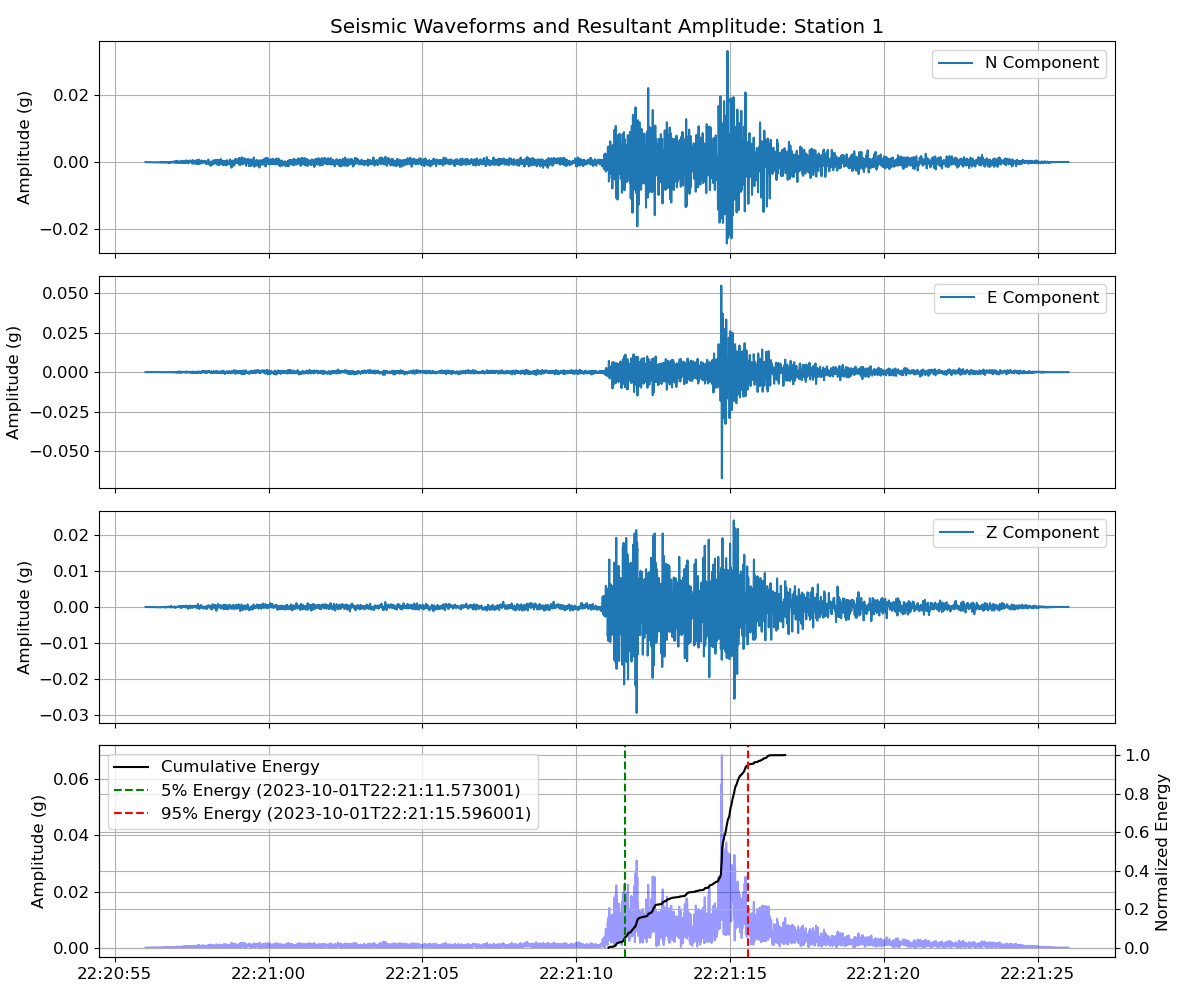

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.7157
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(200, 500)
SNR: 0.6613
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(200, 500)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.94it/s]


Results for Station #01283
  Fitted Omega_0: 1.355101092202732e-10
  Fitted f_c: 0.6354265872934689
  Fitted t*: 0.009104156452362011



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.17it/s]


Results for Station #01356
  Fitted Omega_0: 8.269217125796679e-12
  Fitted f_c: 18.946236710123134
  Fitted t*: 0.05924935907100368
Plot saved to ../results/20231001-2221/fiber-s/(200, 500)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159


[FIBER] 250m → #1295 (misfit: 0.9m)
[FIBER] 550m → #1369 (misfit: 1.3m)
[BOREHOLE] 250m → None
[BOREHOLE] 550m → None
Error with 20231001-2221, (250, 550), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 250m → #1295 (misfit: 0.9m)
[FIBER] 550m → #1369 (misfit: 1.3m)
[BOREHOLE] 250m → None
[BOREHOLE] 550m → None
Error with 20231001-2221, (250, 550), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 250m → #1295 (misfit: 0.9m)
[FIBER] 550m → #1369 (misfit: 1.3m)
[BOREHOLE] 250m → None
[BOREHOLE] 550m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 34351.91it/s]


SNR: 0.5432
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(250, 550)
SNR: 0.5227
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(250, 550)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.60it/s]


Results for Station #01295
  Fitted Omega_0: 8.885082651805534e-11
  Fitted f_c: 0.5016061952447731
  Fitted t*: 0.010641034332319487



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.26it/s]


Results for Station #01369
  Fitted Omega_0: 2.732733966610906e-10
  Fitted f_c: 0.5304088980155176
  Fitted t*: 0.03128593073729728
Plot saved to ../results/20231001-2221/fiber-p/(250, 550)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019


[FIBER] 250m → #1295 (misfit: 0.9m)
[FIBER] 550m → #1369 (misfit: 1.3m)
[BOREHOLE] 250m → None
[BOREHOLE] 550m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 35401.36it/s]


Processing Station 1...
Processed


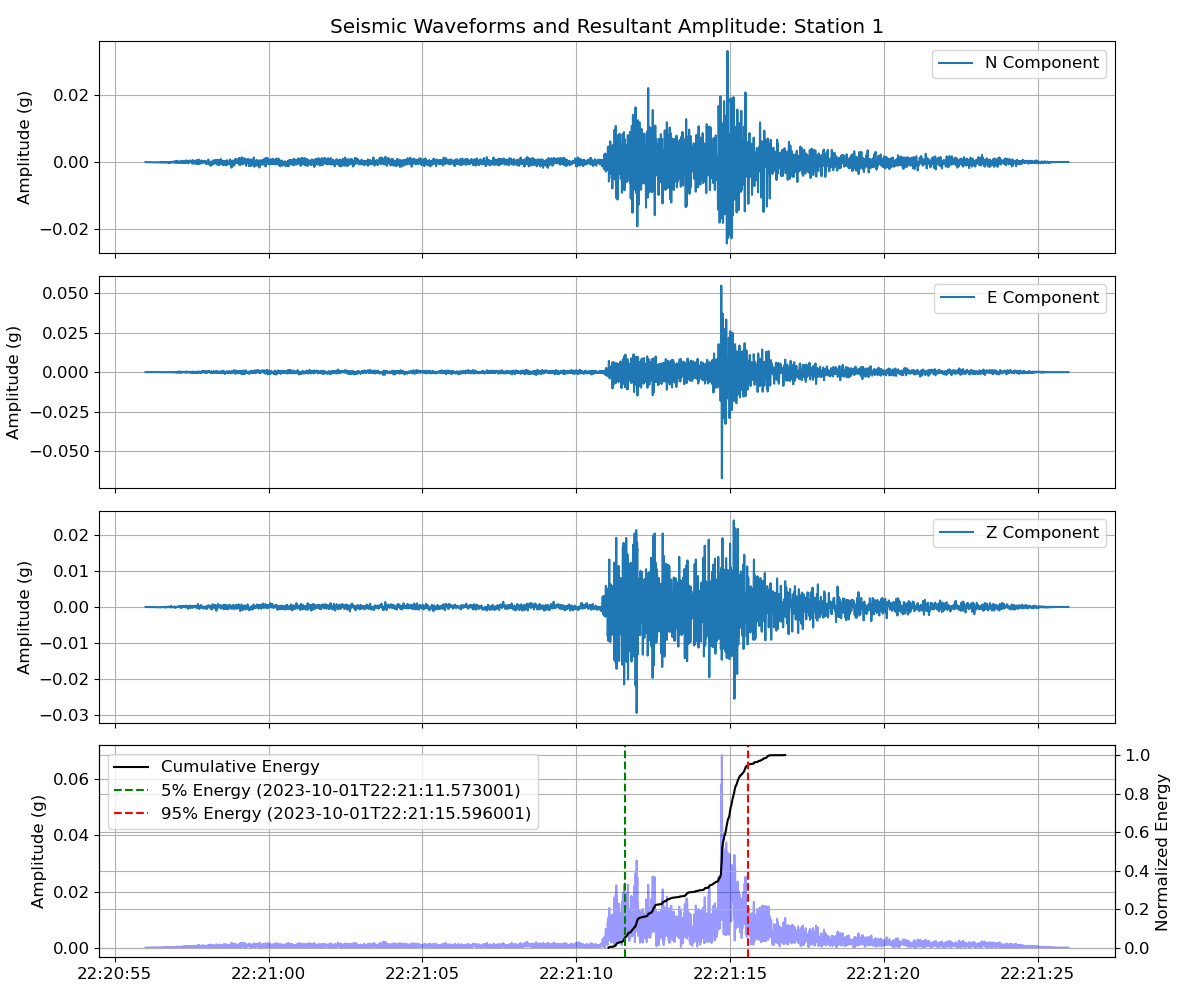

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.8617
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(250, 550)
SNR: 0.6695
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(250, 550)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 113.56it/s]


Results for Station #01295
  Fitted Omega_0: 2.1045978079369155e-10
  Fitted f_c: 0.5428482562464891
  Fitted t*: 0.008720768511661156



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 115.66it/s]


Results for Station #01369
  Fitted Omega_0: 1.8197179082904658e-10
  Fitted f_c: 0.5003562280908072
  Fitted t*: 0.01455856902003547
Plot saved to ../results/20231001-2221/fiber-s/(250, 550)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038


[FIBER] 300m → #1307 (misfit: 1.9m)
[FIBER] 600m → #1381 (misfit: 0.3m)
[BOREHOLE] 300m → MDSA2 (misfit: 2.2m)
[BOREHOLE] 600m → None
Error with 20231001-2221, (300, 600), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 300m → #1307 (misfit: 1.9m)
[FIBER] 600m → #1381 (misfit: 0.3m)
[BOREHOLE] 300m → MDSA2 (misfit: 2.2m)
[BOREHOLE] 600m → None
Error with 20231001-2221, (300, 600), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 300m → #1307 (misfit: 1.9m)
[FIBER] 600m → #1381 (misfit: 0.3m)
[BOREHOLE] 300m → MDSA2 (misfit: 2.2m)
[BOREHOLE] 600m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 24815.23it/s]


SNR: 0.8118
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(300, 600)
SNR: 0.7215
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(300, 600)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 115.38it/s]


Results for Station #01307
  Fitted Omega_0: 8.727720274022729e-11
  Fitted f_c: 0.625642013526724
  Fitted t*: 0.027340060883389784



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 118.25it/s]


Results for Station #01381
  Fitted Omega_0: 1.4855536250995574e-10
  Fitted f_c: 0.5679321303738097
  Fitted t*: 0.021944567811978892
Plot saved to ../results/20231001-2221/fiber-p/(300, 600)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038
8,20231001-2221,fiber,p,"(300, 600)",1307,1381,2507.971985,300,0.766653,0.596787,...,-135.663972,109.421928,178.463984,-0.000882,0.003677,22.538193,0.188020,0.184934,0.005307,0.000044


[FIBER] 300m → #1307 (misfit: 1.9m)
[FIBER] 600m → #1381 (misfit: 0.3m)
[BOREHOLE] 300m → MDSA2 (misfit: 2.2m)
[BOREHOLE] 600m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 35635.02it/s]


Processing Station 1...
Processed


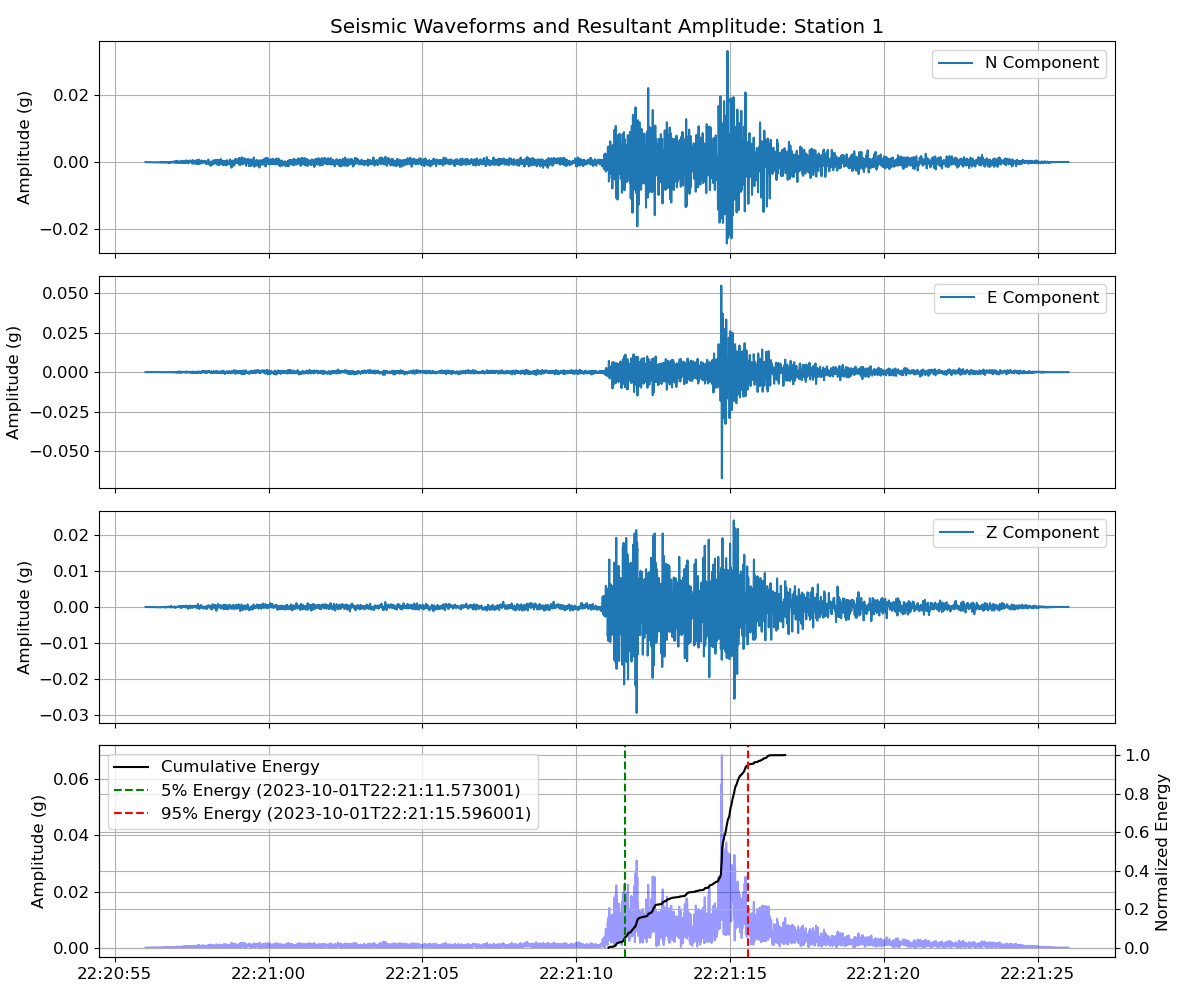

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.7702
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(300, 600)
SNR: 0.6124
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(300, 600)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:09<00:00, 110.43it/s]


Results for Station #01307
  Fitted Omega_0: 2.4916296403292383e-10
  Fitted f_c: 0.6387454646832882
  Fitted t*: 0.015301291556650234



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:09<00:00, 109.15it/s]


Results for Station #01381
  Fitted Omega_0: 1.8428558894220936e-10
  Fitted f_c: 0.539254987263484
  Fitted t*: 0.01327549192113102
Plot saved to ../results/20231001-2221/fiber-s/(300, 600)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038
8,20231001-2221,fiber,p,"(300, 600)",1307,1381,2507.971985,300,0.766653,0.596787,...,-135.663972,109.421928,178.463984,-0.000882,0.003677,22.538193,0.188020,0.184934,0.005307,0.000044
9,20231001-2221,fiber,s,"(300, 600)",1307,1381,1447.978300,300,0.691307,0.589000,...,10.627940,13.529496,3.815399,0.019494,0.010918,113.603812,6.620121,5.929099,0.001824,0.000100


[FIBER] 350m → #1320 (misfit: 1.2m)
[FIBER] 650m → #1393 (misfit: 0.6m)
[BOREHOLE] 350m → None
[BOREHOLE] 650m → None
Error with 20231001-2221, (350, 650), borehole, p: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 350m → #1320 (misfit: 1.2m)
[FIBER] 650m → #1393 (misfit: 0.6m)
[BOREHOLE] 350m → None
[BOREHOLE] 650m → None
Error with 20231001-2221, (350, 650), borehole, s: No file matching file pattern: /home/lulu/data/inci30/borehole/20231001-2221/VL.None..GL*.SAC
[FIBER] 350m → #1320 (misfit: 1.2m)
[FIBER] 650m → #1393 (misfit: 0.6m)
[BOREHOLE] 350m → None
[BOREHOLE] 650m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 34979.38it/s]


SNR: 0.6853
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(350, 650)
SNR: 0.5818
Signal length: 3.732 second
Plot saved to ../results/20231001-2221/fiber-p/(350, 650)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 116.75it/s]


Results for Station #01320
  Fitted Omega_0: 1.1736758996910493e-10
  Fitted f_c: 0.5400937488838488
  Fitted t*: 0.010251981437816455



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 114.88it/s]


Results for Station #01393
  Fitted Omega_0: 7.746377059406198e-11
  Fitted f_c: 0.5794599929245735
  Fitted t*: 0.017016900253794064
Plot saved to ../results/20231001-2221/fiber-p/(350, 650)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038
8,20231001-2221,fiber,p,"(300, 600)",1307,1381,2507.971985,300,0.766653,0.596787,...,-135.663972,109.421928,178.463984,-0.000882,0.003677,22.538193,0.188020,0.184934,0.005307,0.000044
9,20231001-2221,fiber,s,"(300, 600)",1307,1381,1447.978300,300,0.691307,0.589000,...,10.627940,13.529496,3.815399,0.019494,0.010918,113.603812,6.620121,5.929099,0.001824,0.000100


[FIBER] 350m → #1320 (misfit: 1.2m)
[FIBER] 650m → #1393 (misfit: 0.6m)
[BOREHOLE] 350m → None
[BOREHOLE] 650m → None



100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 35319.97it/s]


Processing Station 1...
Processed


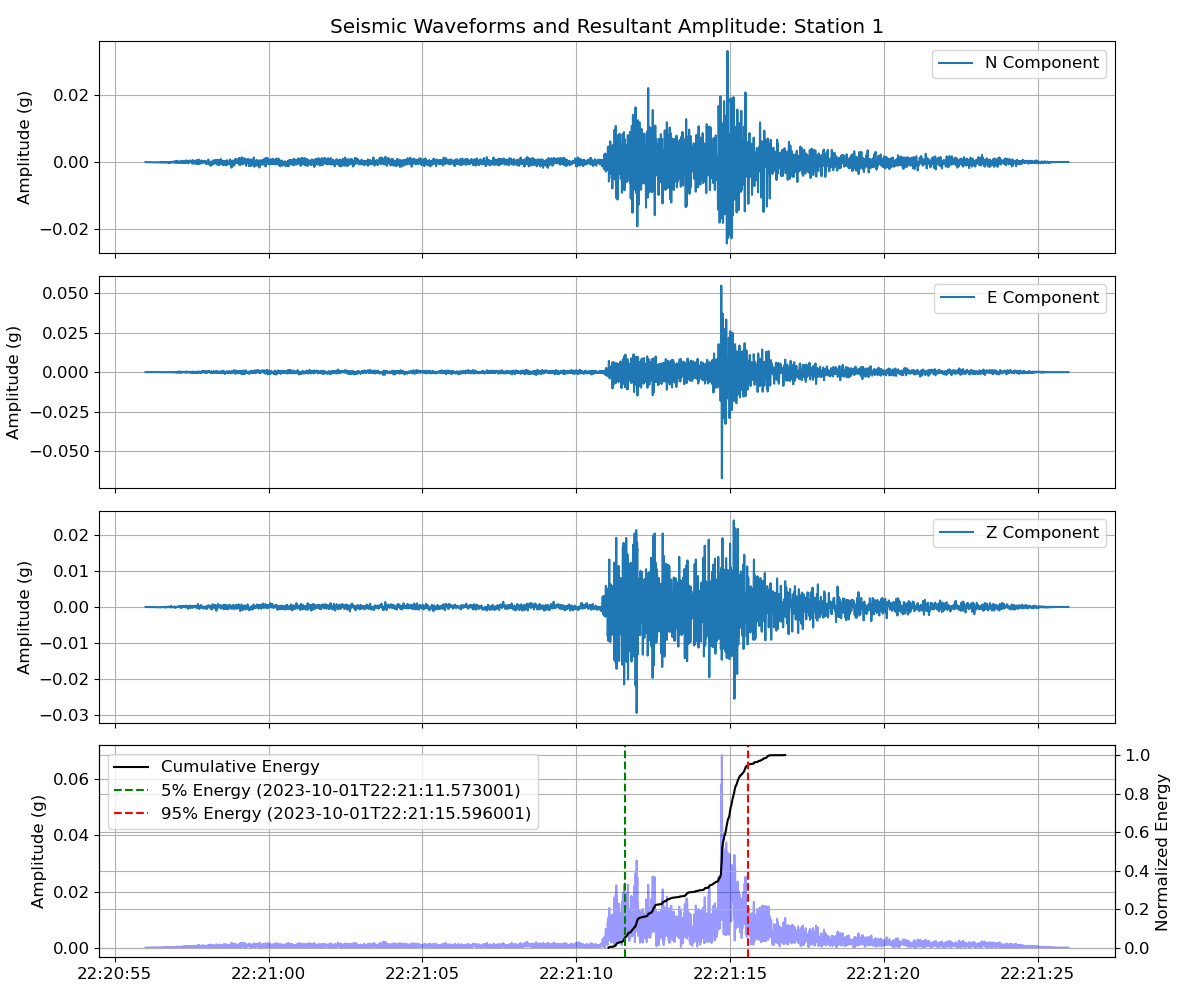

Processing Station 2...
Error processing Station 2: 'NoneType' object is not subscriptable
SNR: 0.4260
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(350, 650)
SNR: 0.7469
Signal length: 1.367 second
Plot saved to ../results/20231001-2221/fiber-s/(350, 650)



Station 1/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 116.86it/s]


Results for Station #01320
  Fitted Omega_0: 1.555304512622394e-10
  Fitted f_c: 0.5642048859287475
  Fitted t*: 0.013301794793844027



Station 2/2 trials: 100%|██████████████████| 1000/1000 [00:08<00:00, 111.32it/s]


Results for Station #01393
  Fitted Omega_0: 2.757214765265184e-10
  Fitted f_c: 0.6069976633280958
  Fitted t*: 0.031061812114232087
Plot saved to ../results/20231001-2221/fiber-s/(350, 650)/omega_fit_resampled.png


,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038
8,20231001-2221,fiber,p,"(300, 600)",1307,1381,2507.971985,300,0.766653,0.596787,...,-135.663972,109.421928,178.463984,-0.000882,0.003677,22.538193,0.188020,0.184934,0.005307,0.000044
9,20231001-2221,fiber,s,"(300, 600)",1307,1381,1447.978300,300,0.691307,0.589000,...,10.627940,13.529496,3.815399,0.019494,0.010918,113.603812,6.620121,5.929099,0.001824,0.000100


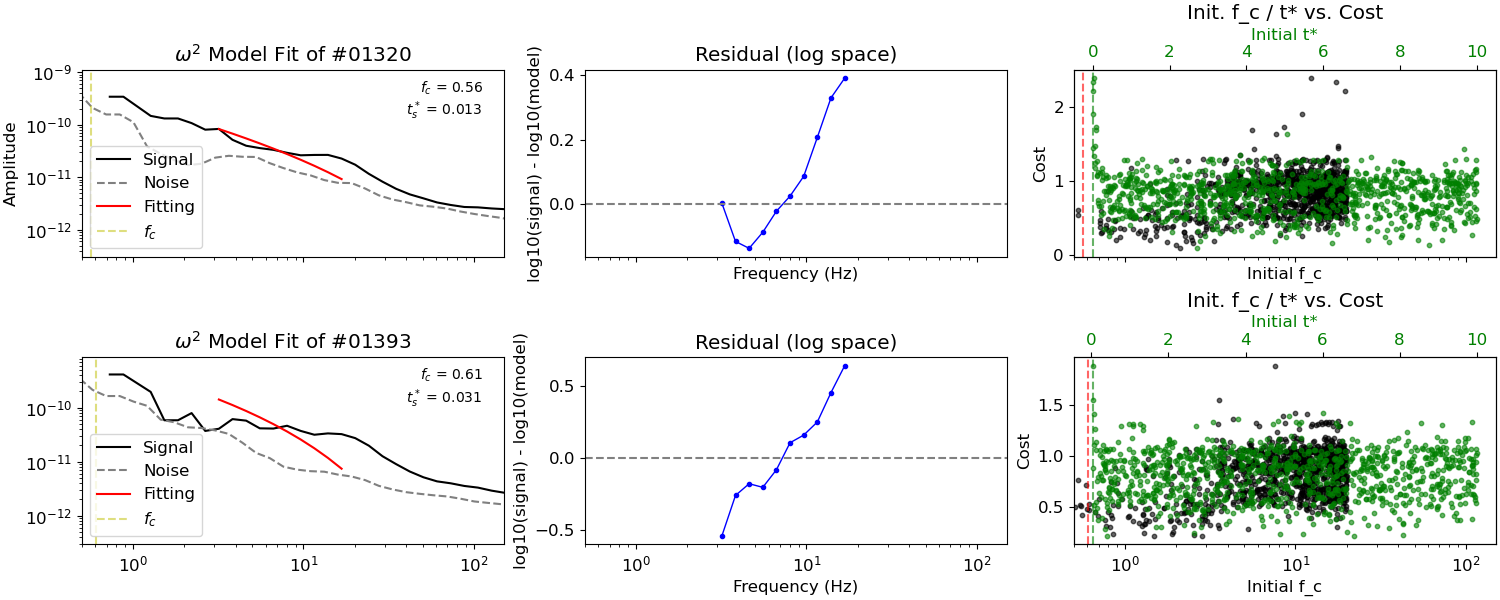

In [23]:
df = None
for event_date, depth_pair, instrument_type, wave_type in tqdm(param_combinations, desc="Processing"):
    try:
        result = analyze_event(
            event_date=event_date,
            data_path=data_path,
            output_path=output_path,
            instrument_type=instrument_type,
            wave_type=wave_type,
            depth_pair=depth_pair,
            plot=True
        )

        result['event_date'] = event_date
        result['depth_pair'] = str(depth_pair)
        result['instrument_type'] = instrument_type
        result['wave_type'] = wave_type

        df = append_result_to_df(result, df)
        display(df)
    except Exception as e:
        print(f"Error with {event_date}, {depth_pair}, {instrument_type}, {wave_type}: {e}")

# 4. Results

In [5]:
# pprint.pprint(result)
# print("Q (原始方法):", result['Q_value_ori'], "+", result['Q_error_ori_pos'], "-", result['Q_error_ori_neg'])
# print("Q (重取樣):", result['Q_value_re'], "+", result['Q_error_re_pos'], "-", result['Q_error_re_neg'])
# print("Q (omega擬合):", result['Q_value'], "+", result['Q_error_pos'], "-", result['Q_error_neg'])
# print("原始法圖檔:", result.get('original_full_png'))
# print("重取樣圖檔:", result.get('resample_ratio_png'))
# print("omega-square圖檔:", result.get('omega_full_png'))

## 4.1 Further Analysis

In [24]:
df

,event_date,instrument_type,wave_type,depth_pair,station1,station2,v,ds,avg_snr,fit_fc,...,Q_value_re,Q_error_re_pos,Q_error_re_neg,ts_re,ts_error_re,Q_value,Q_error_pos,Q_error_neg,ts,ts_error
0,20231001-2221,fiber,p,"(100, 400)",1258,1332,2553.201965,300,0.805822,0.629108,...,18.043642,33.822830,12.303673,0.006512,0.013958,6.161390,0.014742,0.014671,0.019070,0.000046
1,20231001-2221,fiber,s,"(100, 400)",1258,1332,1474.091842,300,0.485462,0.573008,...,19.236314,30.472304,7.310652,0.010580,0.006486,16.254173,0.086414,0.085505,0.012521,0.000066
2,20231001-2221,fiber,p,"(150, 450)",1271,1344,2650.315122,300,0.738250,0.595598,...,-253.451974,238.333634,270.618240,-0.000447,0.007041,64.765723,1.003212,0.973067,0.001748,0.000027
3,20231001-2221,fiber,s,"(150, 450)",1271,1344,1530.160149,300,0.700340,0.620950,...,7.931964,2.648908,1.588163,0.024717,0.006188,9.777650,0.000636,0.000636,0.020052,0.000001
4,20231001-2221,fiber,p,"(200, 500)",1283,1356,2679.019668,300,0.649761,0.559331,...,-21.649890,13.083263,62.712875,-0.005172,0.007899,-12.990265,0.016541,0.016583,-0.008620,0.000011
5,20231001-2221,fiber,s,"(200, 500)",1283,1356,1546.732727,300,0.688504,9.790832,...,42.484845,1106.480865,21.658221,0.004565,0.004748,-9.242955,1.823965,3.013181,-0.020984,0.005159
6,20231001-2221,fiber,p,"(250, 550)",1295,1369,2512.154199,300,0.532979,0.516008,...,75.823367,99.529919,61.237501,0.001575,0.006612,-5.795189,0.005372,0.005382,-0.020607,0.000019
7,20231001-2221,fiber,s,"(250, 550)",1295,1369,1450.392903,300,0.765576,0.521602,...,57.238272,97.946483,40.433448,0.003614,0.008695,-34.970722,0.225213,0.228151,-0.005915,0.000038
8,20231001-2221,fiber,p,"(300, 600)",1307,1381,2507.971985,300,0.766653,0.596787,...,-135.663972,109.421928,178.463984,-0.000882,0.003677,22.538193,0.188020,0.184934,0.005307,0.000044
9,20231001-2221,fiber,s,"(300, 600)",1307,1381,1447.978300,300,0.691307,0.589000,...,10.627940,13.529496,3.815399,0.019494,0.010918,113.603812,6.620121,5.929099,0.001824,0.000100


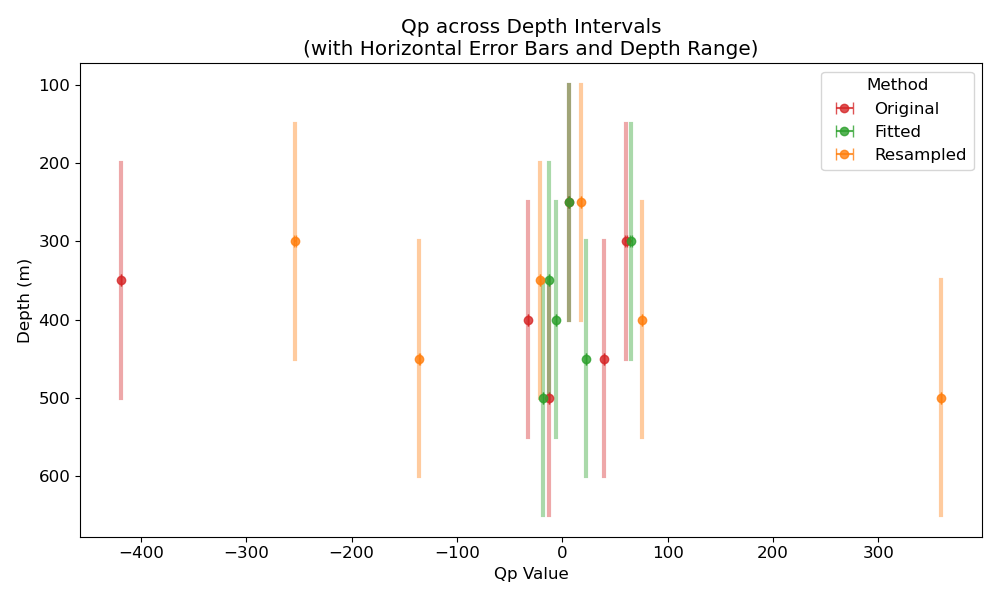

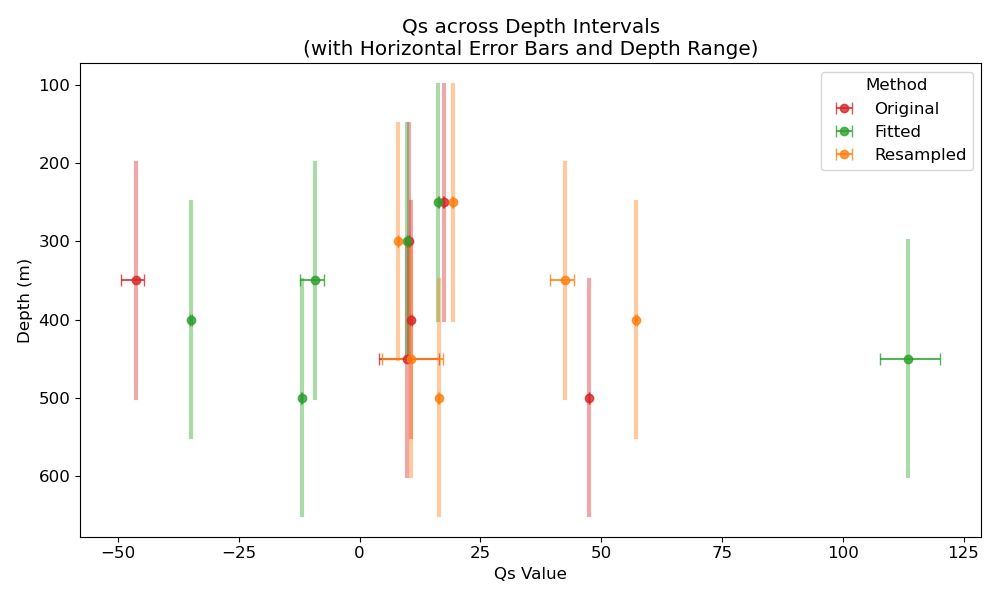

In [25]:
import matplotlib.pyplot as plt
%matplotlib widget

# 預處理欄位
df["depth_start"] = df["depth_pair"].str.extract(r"\((\d+),\s*(\d+)\)")[0].astype(int)
df["depth_end"] = df["depth_pair"].str.extract(r"\((\d+),\s*(\d+)\)")[1].astype(int)
df["depth_center"] = (df["depth_start"] + df["depth_end"]) / 2
df["Q_type"] = df["wave_type"].map({"p": "Qp", "s": "Qs"})

# 方法顏色與標籤
method_colors = {
    "ori": "tab:red",
    "": "tab:green",
    "re": "tab:orange"
}
method_labels = {
    "ori": "Original",
    "": "Fitted",
    "re": "Resampled"
}

# 畫圖：Qp 與 Qs 各一張
plt.rcParams.update({'font.size': 12})
for q_type in ["Qp", "Qs"]:
    plt.figure(figsize=(10, 6))
    subset_df = df[df["Q_type"] == q_type]

    for method_key, color in method_colors.items():
        q_col = f"Q_value_{method_key}" if method_key else "Q_value"
        err_col_pos = "Q_error_pos"
        err_col_neg = "Q_error_neg"

        for _, row in subset_df.iterrows():
            if pd.notna(row[q_col]):
                q_val = row[q_col]
                err_pos = row[err_col_pos]
                err_neg = row[err_col_neg]
                depth_start = row["depth_start"]
                depth_end = row["depth_end"]
                depth_center = (depth_start + depth_end) / 2

                # 畫深度區間線段（代表 Q 值屬於整段深度區間）
                plt.plot(
                    [q_val, q_val],
                    [depth_start, depth_end],
                    color=color,
                    linewidth=3,
                    alpha=0.4
                )

                # 畫橫向誤差棒（代表 Q 值的不確定性）
                plt.errorbar(
                    x=q_val,
                    y=depth_center,
                    xerr=[[err_neg], [err_pos]],
                    fmt='o',
                    color=color,
                    alpha=0.8,
                    capsize=4,
                    label=method_labels[method_key]
                )

    plt.gca().invert_yaxis()
    plt.xlabel(f"{q_type} Value")
    plt.ylabel("Depth (m)")
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title="Method")
    plt.title(f"{q_type} across Depth Intervals\n(with Horizontal Error Bars and Depth Range)")
    plt.tight_layout()
    plt.show()